### 문제 정의 (목표 설정) 
- 타이타닉 데이터를 학습해서 생존자와 사망자를 예측해 보자. 
- 머신러닝의 전체 과정을 진행해보면서 프로세스를 이해해보자. 

In [1]:
# 필요한 라이브러리 import (numpy / pandas / matplotlib / seaborn)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

### 데이터 수집 (Kaggle 사이트에서 다운로드)

In [2]:
# 데이터 불러오기 - 기존 passengerId 컬럼을 인덱스로 설정 
# index_col = '컬럼명' : 기존의 컬럼을 인덱스로 설정해주는 옵션 
train=pd.read_csv('./data/train.csv', index_col='PassengerId')
test=pd.read_csv('./data/test.csv', index_col='PassengerId')

In [3]:
# 데이터 확인 (shape)
train.shape, test.shape

((891, 11), (418, 10))

In [4]:
# 질문 : 왜 컬럼의 수가 다를까? 
# test 에 대한 정답은 kaggle 이 가지고 있음 
# 우리는 test 데이터로 예측을 진행해서 Kaggle 에 제출해야 한다. 

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**타이타닉 데이터의 구조**
- 3개의 파일로 이루어져 있다. 
- train.csv : 학습용 / 훈련용 데이터 
- test.csv : 평가용 데이터 
- gender_submission.csv : 제출용 답안지 서식 파일 

In [7]:
# 불러온 데이터의 컬럼을 살펴보자.
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

**타이타닉 데이터 내부의 컬럼 정보**
- 'PassengerId : 승객의 번호 
- 'Survived' : 생존 여부 (1:생존, 0:사망) / train 에만 존재한다! 
- 'Pclass' : 승객의 등급 (1 ~ 3) / 1:1등급, 2:2등급, 3:3등급
- 'Name' : 승객의 이름 
- 'Sex' : 승객의 성별 
- 'Age' : 승객의 나이 
- 'SibSp' : 동승한 형제자매 또는 배우자의 수 
- 'Parch' : 동승한 부모 또는 자식의 수 
- 'Ticket' : 티켓 번호 
- 'Fare' : 승객이 지불한 요금 
- 'Cabin' : 객실의 번호 
- 'Embarked' : 승선지 (C:쉘부르크(셰르부르) / Q:퀸즈타운 / S:사우스햄튼)

In [9]:
# 데이터프레임에 대한 간략한 정보
# train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
# test
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


**결측치 정리**
- train : Age / Cabin / Embarked
- test : Age / Fare / Cabin

### 데이터 전처리

**Age 살펴보기**

In [11]:
# train 의 Age 살펴보기
train['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
# test 의 Age 살펴보기
test['Age']

PassengerId
892     34.5
893     47.0
894     62.0
895     27.0
896     22.0
        ... 
1305     NaN
1306    39.0
1307    38.5
1308     NaN
1309     NaN
Name: Age, Length: 418, dtype: float64

In [13]:
# 나이의 기술 통계 살펴보기
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Age 컬럼의 특성**
- 타입은 실수형이다. 나이인데? 어라?
- 나이 데이터는 최소값 쪽으로 쏠린 모습을 보인다. (분포가 치우쳐져 있다.)
- 0 ~ 80 까지의 데이터를 가지고 있다. : 일반적인 평균을 구하기엔 범위가 넓다. 
- 다른 컬럼과 상관관계를 살펴보고 연관성 있는 컬럼을 엮어서 상세하게 결측치를 채워보자. 

In [14]:
# 상관관계 : 각 특성별로 영향도를 수치로 파악할 수 있다. (범위 : 1(반비례) ~ 1(비례))
# 절대값이 클수록 (값이 1에 가까울 수록) 영향도가 높다. 
train.corr() # 수치형 데이터만 나온다. (값이 숫자인 데이터만 나온다.)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [15]:
# 상관관계가 높은 데이터를 가지고 피봇테이블을 만들어보자 

In [16]:
pt1=train.pivot_table(values='Age', # 데이터로 사용할 컬럼 지정
                     index=['Pclass', 'Sex'], # 인덱스를 설정하겠다!
                     # 생존 여부에 영향을 많이 미치는 성별도 추가해보겠다. 
                     # 인덱스를 설정할 때 1차로 Pclass 로 나눈뒤 성별로 한 번더 나누겠다. 
                     aggfunc='mean' # 데이터 요약시 사용하는 함수를 지정 
                     # (mean : 평균 / sum : 합 / count : 갯수)
                     )
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

- 나이가 많을수록 등급 숫자가 낮아진다? 

In [17]:
# 멀티 인덱스 인덱싱
pt1.loc[1,'male']

Age    41.281386
Name: (1, male), dtype: float64

In [18]:
# 결측치 확인 - pd.isna()
pd.isna(train['Age'])

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [19]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [20]:
# 불리언 인덱싱으로 확인해보기
train[pd.isna(train['Age'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


- 177 개에 대한 데이터의 조건을 맞춰서 나이값을 넣어주기 어렵다.
- apply 함수를 이용해서 한 번에 값을 처리해주겠다.
- apply() : 다른 함수를 pandas 의 객체에 연결시켜주는 함수 

In [21]:
# 나이를 채워주는 함수를 만들어보자.
def fill_age(data): # 매개변수 data 에는 train 또는 test 데이터가 들어가게 된다! 
    # 만약 data 에 Age 컬럼이 결측치라면 피봇 테이블에서 값을 가져와 넣어줘라. 
    if pd.isna(data['Age']):
        # 위에서 만든 피봇 테이블 멀티 인덱싱 값을 리턴 
        return pt1.loc[data['Pclass'], data['Sex']]
    else:
        # Age 컬럼에 결측치가 없다면 기존의 값을 사용하자. 
        return data['Age']

In [22]:
# Age 결측치 채우기 
train['Age']=train.apply(fill_age, axis=1).astype('int64')

In [23]:
test['Age']=test.apply(fill_age, axis=1).astype('int64')

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [26]:
train['Age'].describe()

count    891.000000
mean      29.191919
std       13.313598
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
test['Age'].describe()

count    418.000000
mean      29.437799
std       12.967482
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64

- Age 결측치 모두 채우기 완료
- 상관관계를 이용해서 나이 데이터를 채워줬다!

**Embarked 데이터 채워주기**
- 결측치 2개 있다. 

In [28]:
# Enbarked 내부 데이터의 구조는 어떻게 되어있었나? 
# Q / S / C 라는 알파벳으로 3 가지 값으로 구분이 되어 있었다. 
# 각각의 갯수를 살펴보자. - 데이터의 분포를 살펴보자. 
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
# 결측치를 채워주는 하무 : fillna()
train['Embarked']=train['Embarked'].fillna('S')

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


**Fare 채워주기**
- test에 결측치가 있다. 

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [32]:
# Fare 에 대한 기술 통계 살펴보기 
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

- Fare 컬럼은 최대값 / 최소값을 봤을 때 편차가 크고 평균과 사분위수가 한쪽으로 쏠려있다. 
- 전체 금액을 가지고 평균을 구하면 신뢰성이 많이 떨어질 것 같다. 

In [33]:
# 상관계수 살펴보기 - train 사용 
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [34]:
train['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [35]:
# 피봇 테이블 만들어보기 [연관관계가 높은 컬럼, 성별], 금액은 평균을 구해볼거임! 
# train 사용 
pt2=train.pivot_table(values='Fare', # 데이터로 사용할 컬럼 지정
                     index=['Pclass', 'Sex'], # 인덱스를 설정하겠다!
                     # 생존 여부에 영향을 많이 미치는 성별도 추가해보겠다. 
                     # 인덱스를 설정할 때 1차로 Pclass 로 나눈뒤 성별로 한 번더 나누겠다. 
                     aggfunc='mean' # 데이터 요약시 사용하는 함수를 지정 
                     # (mean : 평균 / sum : 합 / count : 갯수)
                     )
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [36]:
# test['Fare']의 비어있는 곳 찾기 - isnull() 
test['Fare'].isnull()

PassengerId
892     False
893     False
894     False
895     False
896     False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Name: Fare, Length: 418, dtype: bool

In [37]:
# 불리언 인덱싱으로 값을 가져와보자 
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [38]:
# fillna() 함수 이용해서 값을 채워주자. 
# test['Fare']=test['Fare'].fillna(12.661633)
_3Male=pt2.loc[3,'male']
test['Fare']=test['Fare'].fillna(12.661633)

In [39]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


**Cabin 채워주기**
- train / test 모두 결측치가 많다. ( 이럴 경우 컬럼을 삭제하는 것도 고려한다.)
- 일단은 결측치에 임의의 값을 넣어보고 시각화까지 해서 사용여부를 판단하자. 

In [43]:
# Cabin 컬럼의 고윳값 살펴보기 
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- 데이터의 모양이 알파벳과 숫자 순으로 이뤄졌다. 
- 여러개가 묶인 데이터는 모두 같은 알파벳을 사용한다. 
- 타이타닉호의 단면도와 정보를 찾아보니 알파벳은 층수 / 숫자는 방번호를 이야기한다. 
- 알파벳을 가지고 와서 층수 정보를 활용할 수 있을까? : 가능할 것 같다. 

In [44]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

- 데이터가 고유값이 너무 많다. (데이터가 넓고 얕게 분포되어 있다.)
- 알파벳만 빼와서 사용하면 어떤 형태가 되는지 살펴보자. 

In [45]:
# 우선 결측치부터 채우고 시작하자!
# 임의의 문자 'M' 을 넣어서 채워주고 Deck 컬럼을 생성하자. 
train['Deck']=train['Cabin'].fillna('M')
test['Deck']=test['Cabin'].fillna('M')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 39.2+ KB


In [48]:
# Deck 컬럼에서 맨 앞 영문자만 따오자! 
train['Deck']=train['Deck'].str[0]
test['Deck']=test['Deck'].str[0]

In [49]:
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [50]:
# train / test info() 확인 

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 39.2+ KB


### 탐색적 데이터 분석 (EDA) 

**Deck 컬럼 살펴보기**

In [53]:
# groupby : 
train_deck=train[['Deck','Survived','Name']].groupby(['Deck','Survived']).count()
train_deck

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

In [54]:
pt3=train.pivot_table(values='Name', # 데이터로 사용할 컬럼 지정
                     index=['Deck', 'Survived'], # 인덱스를 설정하겠다!
                     # 생존 여부에 영향을 많이 미치는 성별도 추가해보겠다. 
                     # 인덱스를 설정할 때 1차로 Pclass 로 나눈뒤 성별로 한 번더 나누겠다. 
                     aggfunc='count' # 데이터 요약시 사용하는 함수를 지정 
                     # (mean : 평균 / sum : 합 / count : 갯수)
                     )
pt3

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

<AxesSubplot:xlabel='Deck', ylabel='count'>

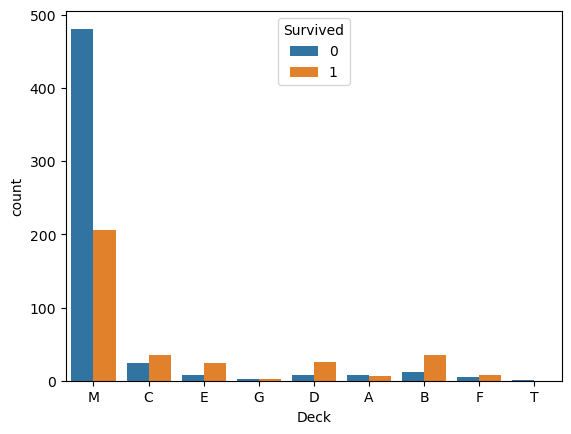

In [55]:
# seaborn 라이브러리를 이용해서 시각화를 진행해보자
sns.countplot(data=train,
             x='Deck',
             hue='Survived')

- M 이라는 곳에서 상대적으로 사람이 많이 죽었음. (결측치가 있는 부분)
- 한 번 사용해보자!

**Pclass 살펴보기**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

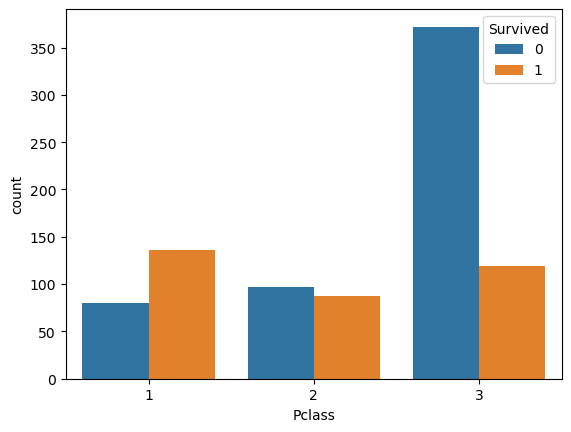

In [56]:
sns.countplot(data=train,
             x='Pclass',
             hue='Survived')

- 1 등급의 사람이 많이 살았고 3 등급의 사람이 많이 죽었음. 

**Deck 와 Pclass 를 동시에 시각화 해보자**

<AxesSubplot:xlabel='Deck', ylabel='count'>

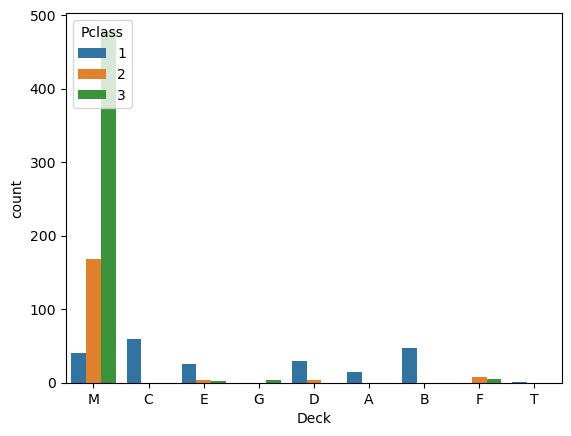

In [57]:
sns.countplot(data=train,
             x='Deck',
             hue='Pclass')

- Deck 이 'M' 인 데이터 (결측치인 부분) 에는 3등급 사람이 많이 있었다. 
- 3 등급의 사람들이 생존율이 낮았다. 
- 당연히 Deck 이 'M' 인 사람들도 생존율이 낮을 수 밖에 없었다. 

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

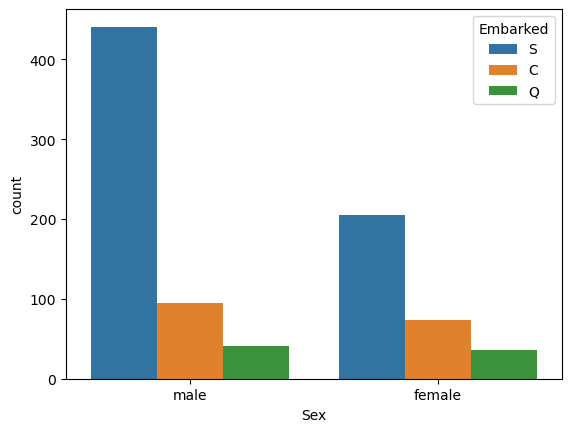

In [59]:
# 성별과 승선지를 시각화 해보자
sns.countplot(data=train,
             x='Sex',
             hue='Embarked')

- 성별과 승선지는 고른 비율이 나타내고 있음
- 풀이 : 남녀모두 사우스햄튼에서 많이 탔다

<AxesSubplot:xlabel='Embarked', ylabel='count'>

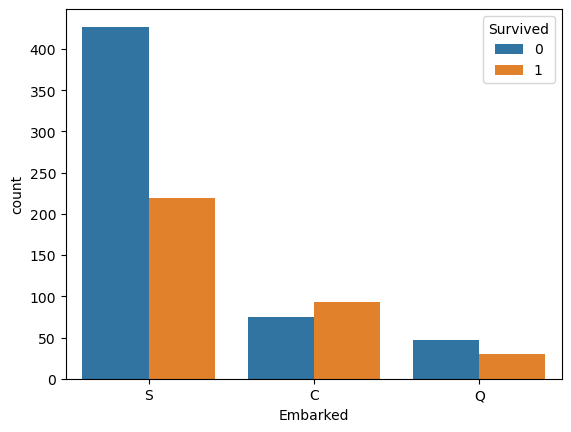

In [60]:
# 승선지와 생존을 시각화 해보자
sns.countplot(data=train,
             x='Embarked',
             hue='Survived')

- 승선지와 생존은 고른 비율을 나타내고 있음
- 풀이 : 쉘부르크를 제외한 승선지는 사망자가 많았다. 사우스햄튼에서 많이 사망함)

<AxesSubplot:xlabel='Sex', ylabel='count'>

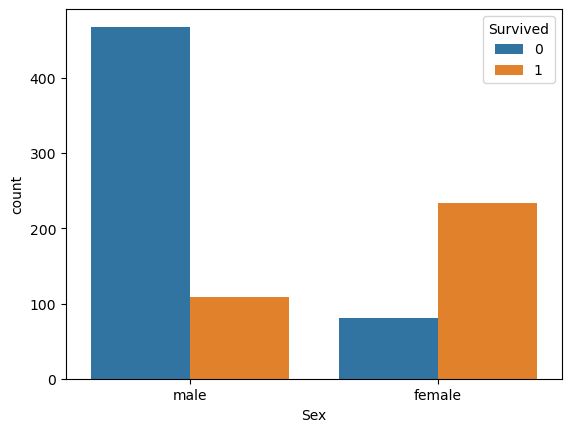

In [61]:
# 성별과 생존을 시각화 해보자 
sns.countplot(data=train,
             x='Sex',
             hue='Survived')

- 성별과 생존은 남자의 사망이 월등히 많음
- 풀이 : 남자가 많이 사망하고 여자가 많이 생존함. 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

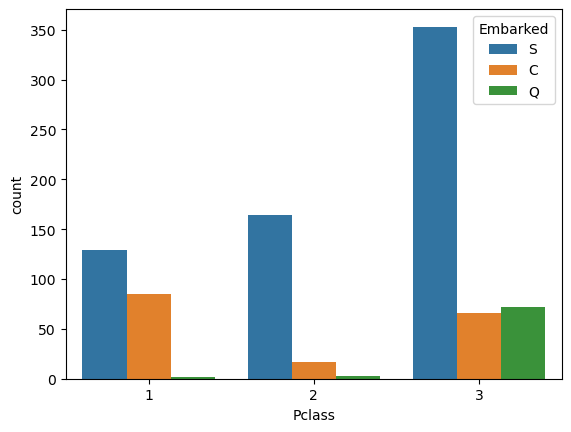

In [62]:
# 승객 등급과 승선지를 시각화 해보자
sns.countplot(data=train,
             x='Pclass',
             hue='Embarked')

- 승객 등급과 승선지는 등급이 낮을수록 사망이 높았고, 승객 등급이 3등급이면서 승선지가 '퀸즈타운'인 승객의 비율이 높게 나타남
- 풀이 : 3등급에 사우스햄튼 탑승자가 많다!

<AxesSubplot:xlabel='Deck', ylabel='count'>

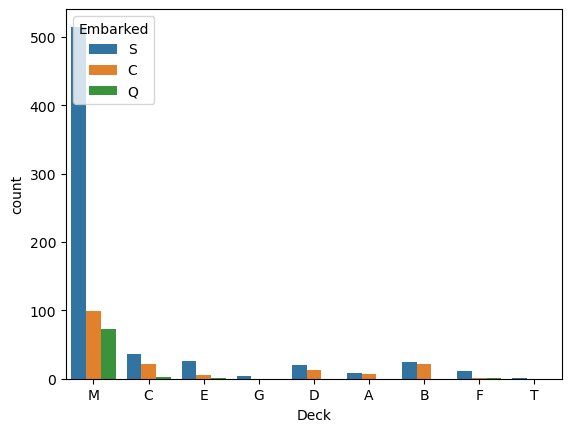

In [63]:
# Deck 와 승선지를 시각화 해보자
sns.countplot(data=train,
             x='Deck',
             hue='Embarked')

- 갑판(입석)과 승선지는 비율이 골고루 나타났음
- Deck 이 M 인 사람은 사우스햄튼에서 많이 탔다. 

**Age 컬럼 시각화**

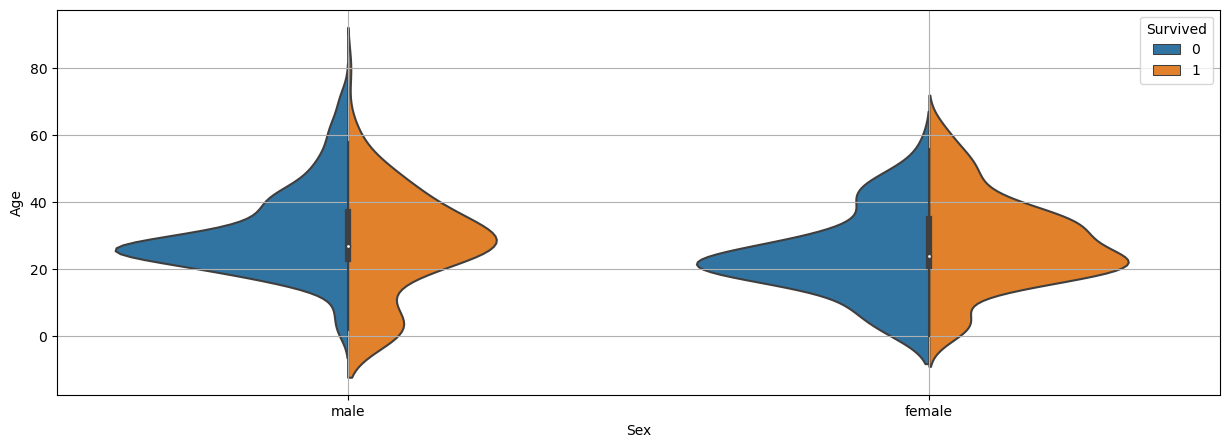

In [64]:
plt.figure(figsize=(15,5))
# 바이올린 플롯 : 바이올린 모양으로 데이터의 분포와 밀도를 보기 쉽게 나타낸 차트
# 데이터가 많은 부분은 두께가 두껍게 / 작게 분포하는 부분은 얇게 나타냄 
sns.violinplot(data=train,
              x='Sex',
              y='Age',
               hue='Survived', 
               split=True
              )
plt.grid()

# 가운데 하얀색 점 : 중앙값 
# 바이올린 내부의 두꺼운 선 : 사분위수의 범위 (1사분위 3사분위 사이)
# 바이올린 내부의 얇은 선 : 신뢰구간 (95% 정도의 신뢰성이 있는 데이터다! 라는걸 표현)

# 수치형 데이터는 연속적인 값을 가지고 있다. 그래서 유니크 값이 많으면 
# 막대그래프의 막대가 많아진다. (보기 어려워진다.)
# 연속된 데이터를 시각화 할때는 곡선형 그래프를 많이 이용한다. 

- 20 대 에서 40 대가 많이 사망함 / 전체적인 탑승자도 많았음. 
- 나이 많은 사람들의 생존율이 높다. 
- 20 세 이하 미성년자는 남자의 생존 비율이 더 높다. 

**Fard 살펴보기**

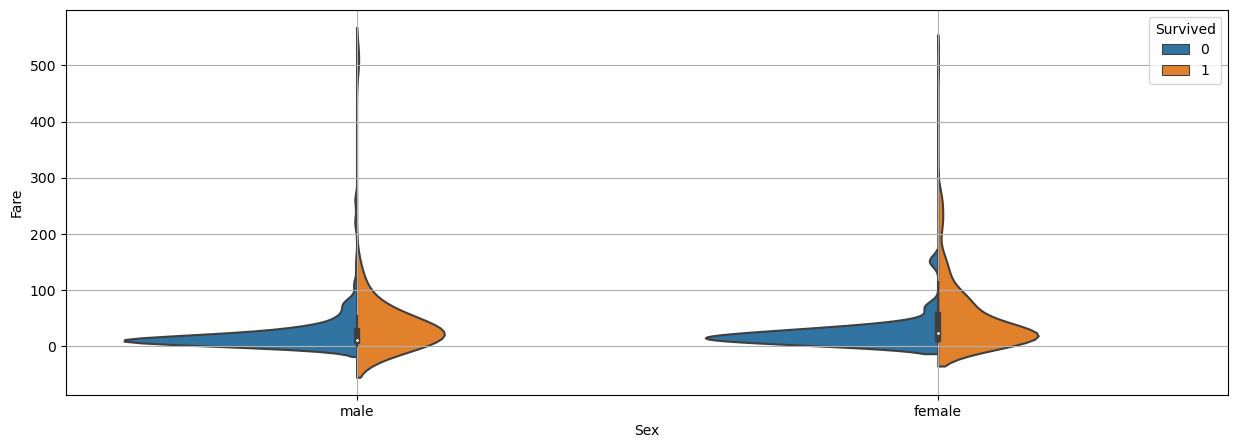

In [65]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train,
              x='Sex',
              y='Fare',
               hue='Survived', 
               split=True
              )
plt.grid()

- 돈을 적게 낸 사람이 많이 죽었다. 

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


### SibSp, Parch 살펴보기
- SibSp : 함께 탑승한 형제 / 자매 / 배우자 
- Parch : 함께 탑승한 부모 / 자식

In [67]:
# 컬럼 추가
train['Family_Size']=train['Parch']+train['SibSp']+1
test['Family_Size']=test['Parch']+test['SibSp']+1

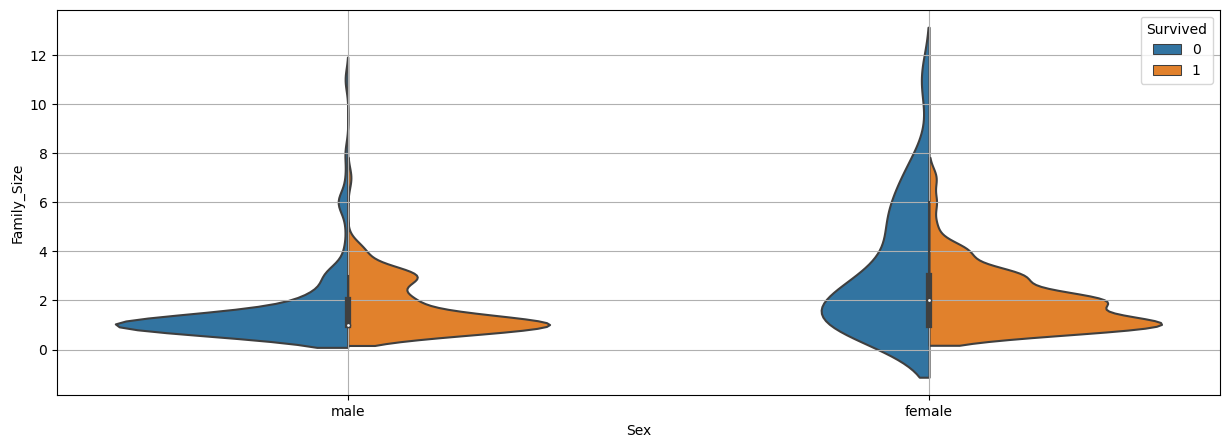

In [68]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train,
              x='Sex',
              y='Family_Size',
               hue='Survived', 
               split=True
              )
plt.grid()

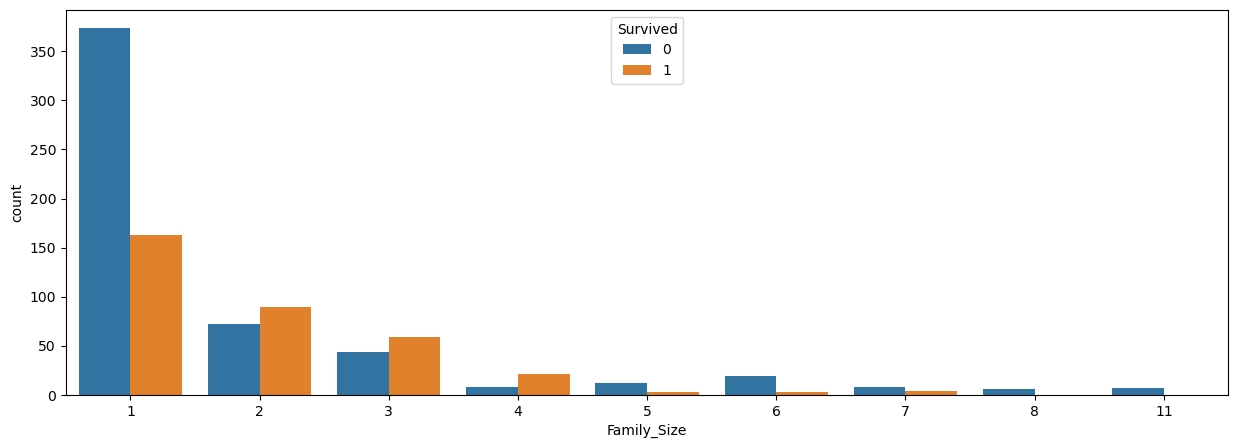

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(data=train,
              x='Family_Size',
               hue='Survived', 
             )
plt.show()

- 혼자 왔을 때 많이 죽었다. 
- 가족이 2 ~ 4 명 사이일 때 생존율이 올라갔다. 
- 5명 이상일때는 사망율이 올라갔다. 

In [70]:
# 가족 사이즈가 1 이면 Alone / 2 ~ 4 이면 Small / 5 명 이상이면 Large
# 전체 가족의 숫자를 범주화 시켜서 Family_Group 이라는 컬럼을 생성
# Binning : 수치형 데이터를 범주형 데이터로 바꿔주는 작업 
# 사소한 관찰의 오류를 줄여주기 위해 실행 
bins=[0,1,4,11]
labels=['Alone','Small','Large']

train['Family_Group']=pd.cut(train['Family_Size'],
                            bins=bins,
                            labels=labels
                            )
test['Family_Group']=pd.cut(test['Family_Size'],
                            bins=bins,
                            labels=labels
                            )

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_Size   891 non-null    int64   
 13  Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 98.5+ KB


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_Size   891 non-null    int64   
 13  Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 98.5+ KB


In [73]:
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [74]:
train['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

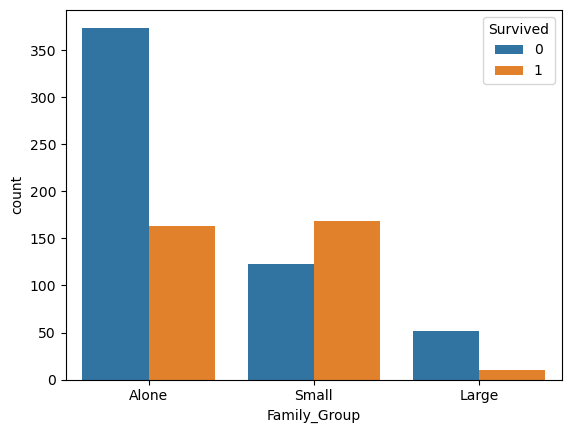

In [75]:
sns.countplot(data=train,
              x='Family_Group',
               hue='Survived', 
             )
plt.show()

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_Size   891 non-null    int64   
 13  Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 98.5+ KB


### Name 다뤄보기
- 텍스트 데이터인 Name 을 다뤄보자

In [77]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [78]:
len(train['Name'].unique())

891

- 외국의 이름은 미들네임 (중간호칭) 이 있다. 
- 미들네임은 성별 / 결혼 유무 / 신분 / 직업을 표시해주는 부분이다. 
- 미들네임만 추출해서 사용해보자. 

In [79]:
train['Name'][1]

'Braund, Mr. Owen Harris'

In [80]:
train['Name'][1].split(',')

['Braund', ' Mr. Owen Harris']

In [81]:
train['Name'][1].split(',')[1]

' Mr. Owen Harris'

In [82]:
train['Name'][1].split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [83]:
train['Name'][1].split(',')[1].split('.')[0]

' Mr'

In [84]:
# strip() : 특정 문자열의 최선두와 최후미의 공백을 제거해주는 함수 
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [85]:
# 이름을 쪼개주는 함수를 만들자!
def split_title(data):
    result=data.split(',')[1].split('.')[0].strip()
    return result

In [86]:
train['Title']=train['Name'].apply(split_title)
test['Title']=test['Name'].apply(split_title)
# train.apply 였다면 '2차원 데이터프레임'이 들어가서 축설정이 필요했다 (axis 가 필요했다)
# train['Name'].apply 였다면 '1차원 시리즈'가 들어가서 축설정이 필요없다 

In [87]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [88]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

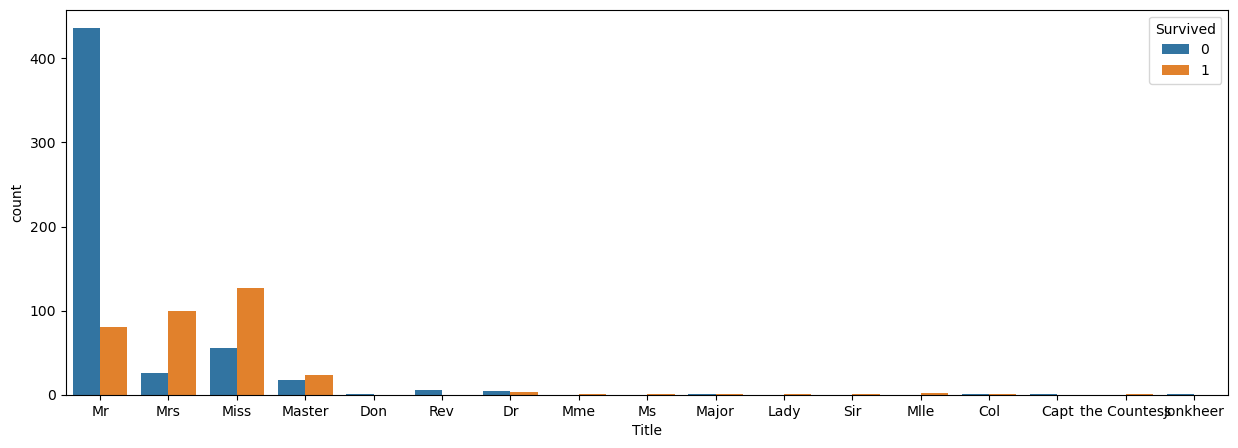

In [89]:
plt.figure(figsize=(15,5))
sns.countplot(data=train,
             x='Title',
             hue='Survived')

- Title 호칭 정리
    - 'Mr' : 결혼한 남자 
    - 'Mrs' : 결혼한 여자
    - 'Miss' : 결혼 안한 여자 => 미혼의 여성 
    - 'Master' : 결혼 안한 남성 => 어린 미성년자
    - 'Don' : 남자에 대한 호칭 
    - 'Rev' : 목사
    - 'Dr' : 박사 / 의사라는 뜻이 있음 
    - 'Mme' : 기혼 여성을 높여 부르는 말
    - 'Ms' : 결혼 여부와 상관 없이 여성을 부르는 호칭 
    - 'Major' : 소령 / 시장 
    - 'Lady' : 아가씨 
    - 'Sir' : 기사 작위
    - 'Mlle' : 마드모아젤 / 프랑스에서 미혼 여성에게 일반적으로 붙는 호칭 
    - 'Col' : 육군 대령
    - 'Capt' : 선장 / 대위 
    - 'the Countess' : 주지사 
    - 'Jonkheer' : 작위가 없는 무명 귀족 

- Mr, Mrs, Miss, Master, Rev 를 제외한 모든 호칭은 상대적으로 갯수가 적으니까 Other 라고 묶어서 활용해보자. 

In [90]:
# train['Title'] 의 unique 값을 그대로 복사해와서 title 이라는 리스트에 담아주기 
# Don / Rev 라는 호칭의 순서를 바꿔주자 (zip 함수를 사용할 때 순서를 맞춰주기 위해서)
title=['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']
title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Don',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer']

In [91]:
convert_title=['Mr','Mrs','Miss','Master','Rev']+['Other']*12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [92]:
# dict(zip()) 함수를 이용해서 리스트형태인 title 과 convert_title 을 차례대로 
# key 와 value 로 가지는 딕셔너리로 만들겠다! 
title_dict=dict(zip(title, convert_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [93]:
title_dict['Dona']='Other'
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [94]:
# 실제 데이터프레임 title 컬럼에 있는 내부의 value 값을 title_dict 를 이용해서 변환시켜주자 
train['Title']=train['Title'].map(title_dict)
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [95]:
test['Title']=test['Title'].map(title_dict)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

**Ticket 살펴보기**

In [96]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

- Ticket 은 데이터가 너무 넓고 얕게 분포가 되어있다. 
- Cabin 처럼 특정한 패턴을 가지고 있지도 않다. 
- 사용할 수 없는 것으로 판단을 하고 삭제를 진행하자. 

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_Size   891 non-null    int64   
 13  Family_Group  891 non-null    category
 14  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(7)
memory usage: 137.7+ KB


In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           418 non-null    int64   
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          418 non-null    float64 
 8   Cabin         91 non-null     object  
 9   Embarked      418 non-null    object  
 10  Deck          418 non-null    object  
 11  Family_Size   418 non-null    int64   
 12  Family_Group  418 non-null    category
 13  Title         418 non-null    object  
dtypes: category(1), float64(1), int64(5), object(7)
memory usage: 46.3+ KB


**필요없는 컬럼 삭제**
- train : Ticket, Name, SibSp, Parch, Cabin, Family_Size
- test : Ticket, Name, SibSp, Parch, Cabin, Family_Size

In [99]:
train.drop(['Ticket', 'Name', 'SibSp', 'Parch', 'Cabin', 'Family_Size'],axis=1,inplace=True)
test.drop(['Ticket', 'Name', 'SibSp', 'Parch', 'Cabin', 'Family_Size'],axis=1,inplace=True)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
 8   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   Fare          418 non-null    float64 
 4   Embarked      418 non-null    object  
 5   Deck          418 non-null    object  
 6   Family_Group  418 non-null    category
 7   Title         418 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 26.7+ KB


### 모델링
- 데이터 분리

In [102]:
# 데이터 문제 / 정답 분리
# hint = train 에는 있고 test 에는 없는 컬럼이 있다. 이게 정답이다. 'Survived' 
display(train,test)

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,,
1,0,3,male,22,7.2500,S,M,Small,Mr
2,1,1,female,38,71.2833,C,C,Small,Mrs
3,1,3,female,26,7.9250,S,M,Alone,Miss
4,1,1,female,35,53.1000,S,C,Small,Mrs
5,0,3,male,35,8.0500,S,M,Alone,Mr
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,13.0000,S,M,Alone,Rev
888,1,1,female,19,30.0000,S,B,Alone,Miss
889,0,3,female,21,23.4500,S,M,Small,Miss


,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,
892,3,male,34,7.8292,Q,M,Alone,Mr
893,3,female,47,7.0000,S,M,Small,Mrs
894,2,male,62,9.6875,Q,M,Alone,Mr
895,3,male,27,8.6625,S,M,Alone,Mr
896,3,female,22,12.2875,S,M,Small,Mrs
...,...,...,...,...,...,...,...,...
1305,3,male,26,8.0500,S,M,Alone,Mr
1306,1,female,39,108.9000,C,C,Alone,Other
1307,3,male,38,7.2500,S,M,Alone,Mr


In [103]:
train_edit=train.iloc[:,1:]
train_edit

,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,
1,3,male,22,7.2500,S,M,Small,Mr
2,1,female,38,71.2833,C,C,Small,Mrs
3,3,female,26,7.9250,S,M,Alone,Miss
4,1,female,35,53.1000,S,C,Small,Mrs
5,3,male,35,8.0500,S,M,Alone,Mr
...,...,...,...,...,...,...,...,...
887,2,male,27,13.0000,S,M,Alone,Rev
888,1,female,19,30.0000,S,B,Alone,Miss
889,3,female,21,23.4500,S,M,Small,Miss


In [104]:
display(train_edit,test)

,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,
1,3,male,22,7.2500,S,M,Small,Mr
2,1,female,38,71.2833,C,C,Small,Mrs
3,3,female,26,7.9250,S,M,Alone,Miss
4,1,female,35,53.1000,S,C,Small,Mrs
5,3,male,35,8.0500,S,M,Alone,Mr
...,...,...,...,...,...,...,...,...
887,2,male,27,13.0000,S,M,Alone,Rev
888,1,female,19,30.0000,S,B,Alone,Miss
889,3,female,21,23.4500,S,M,Small,Miss


,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,
892,3,male,34,7.8292,Q,M,Alone,Mr
893,3,female,47,7.0000,S,M,Small,Mrs
894,2,male,62,9.6875,Q,M,Alone,Mr
895,3,male,27,8.6625,S,M,Alone,Mr
896,3,female,22,12.2875,S,M,Small,Mrs
...,...,...,...,...,...,...,...,...
1305,3,male,26,8.0500,S,M,Alone,Mr
1306,1,female,39,108.9000,C,C,Alone,Other
1307,3,male,38,7.2500,S,M,Alone,Mr


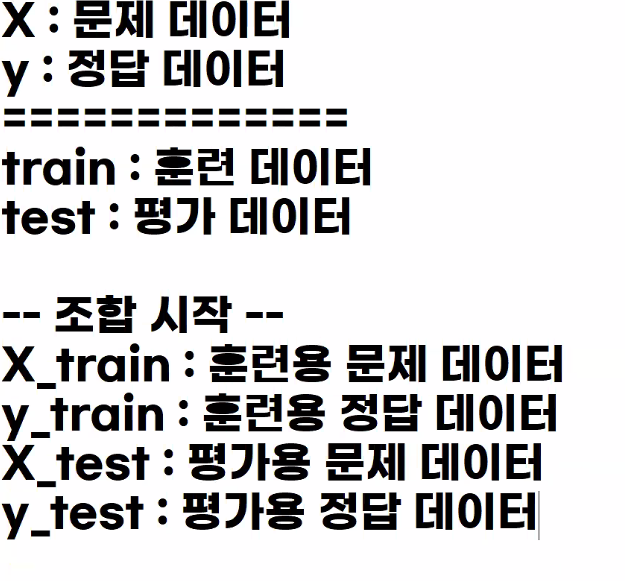

In [105]:
# 데이터 문제 / 정답 분리
# hint : train 에는 있고 test 에는 없는 컬럼이 있다. 이게 정답이다. 'Survived' 
X_train=train.drop('Survived', axis=1)
y_train=train['Survived']
X_test=test

In [106]:
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [107]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,
1,3,male,22,7.2500,S,M,Small,Mr
2,1,female,38,71.2833,C,C,Small,Mrs
3,3,female,26,7.9250,S,M,Alone,Miss
4,1,female,35,53.1000,S,C,Small,Mrs
5,3,male,35,8.0500,S,M,Alone,Mr
...,...,...,...,...,...,...,...,...
887,2,male,27,13.0000,S,M,Alone,Rev
888,1,female,19,30.0000,S,B,Alone,Miss
889,3,female,21,23.4500,S,M,Small,Miss


**문자형의 데이터를 원-핫 인코딩 진행**
- pd.get_dummies() 사용

In [108]:
# 원 - 핫 인코딩
# get_dummies 를 사용하면 문자형 데이터는 전부 원핫 인코딩이 진행된다. 
# 숫자 데이터는? 그대로 사용한다. 
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [109]:
X_train.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,7.2500,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,38,71.2833,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,26,7.9250,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,35,53.1000,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,3,35,8.0500,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [110]:
X_test.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,1,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
893,3,47,7.0000,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,9.6875,0,1,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
895,3,27,8.6625,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,12.2875,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [111]:
# info 함수로 확인하기 : X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    uint8  
 4   Sex_male            891 non-null    uint8  
 5   Embarked_C          891 non-null    uint8  
 6   Embarked_Q          891 non-null    uint8  
 7   Embarked_S          891 non-null    uint8  
 8   Deck_A              891 non-null    uint8  
 9   Deck_B              891 non-null    uint8  
 10  Deck_C              891 non-null    uint8  
 11  Deck_D              891 non-null    uint8  
 12  Deck_E              891 non-null    uint8  
 13  Deck_F              891 non-null    uint8  
 14  Deck_G              891 non-null    uint8  
 15  Deck_M              891 non-null    uint8  
 16  Deck_T  

In [112]:
# info 함수로 확인하기 : X_test 
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    uint8  
 4   Sex_male            418 non-null    uint8  
 5   Embarked_C          418 non-null    uint8  
 6   Embarked_Q          418 non-null    uint8  
 7   Embarked_S          418 non-null    uint8  
 8   Deck_A              418 non-null    uint8  
 9   Deck_B              418 non-null    uint8  
 10  Deck_C              418 non-null    uint8  
 11  Deck_D              418 non-null    uint8  
 12  Deck_E              418 non-null    uint8  
 13  Deck_F              418 non-null    uint8  
 14  Deck_G              418 non-null    uint8  
 15  Deck_M              418 non-null    uint8  
 16  Famil

In [113]:
# shape 찍어보기 
X_train.shape, X_test.shape

((891, 26), (418, 25))

- 인코딩 이후에 X_train / X_test 의 컬럼수가 차이가 난다.

In [114]:
# set : 중복이 없는 요소들로만 구성된 집합의 형태로 바꿔주는 함수 
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [115]:
# 불리언 인덱싱을 통해서 Deck 이 T 인 사람이 누구인지 보자 
train[train['Deck']=='T']

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,,
340,0,1,male,45,35.5,S,T,Alone,Mr


- Deck_T 라는 데이터는 train 에 1 개만 존재하는 데이터였다. 
- 원 핫 인코딩의 특성상 값이 존재하면 1 / 존재하지 않으면 0 
- 그러면 test 에는 Deck_T 라는 데이터가 존재하지 않았다. 
- 무슨 값으로 채워주자? => 0 으로 채워주자. 

In [116]:
X_test['Deck_T']=0

In [177]:
X_test['Deck_T']

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: Deck_T, Length: 418, dtype: int64

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    uint8  
 4   Sex_male            891 non-null    uint8  
 5   Embarked_C          891 non-null    uint8  
 6   Embarked_Q          891 non-null    uint8  
 7   Embarked_S          891 non-null    uint8  
 8   Deck_A              891 non-null    uint8  
 9   Deck_B              891 non-null    uint8  
 10  Deck_C              891 non-null    uint8  
 11  Deck_D              891 non-null    uint8  
 12  Deck_E              891 non-null    uint8  
 13  Deck_F              891 non-null    uint8  
 14  Deck_G              891 non-null    uint8  
 15  Deck_M              891 non-null    uint8  
 16  Deck_T  

In [118]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    uint8  
 4   Sex_male            418 non-null    uint8  
 5   Embarked_C          418 non-null    uint8  
 6   Embarked_Q          418 non-null    uint8  
 7   Embarked_S          418 non-null    uint8  
 8   Deck_A              418 non-null    uint8  
 9   Deck_B              418 non-null    uint8  
 10  Deck_C              418 non-null    uint8  
 11  Deck_D              418 non-null    uint8  
 12  Deck_E              418 non-null    uint8  
 13  Deck_F              418 non-null    uint8  
 14  Deck_G              418 non-null    uint8  
 15  Deck_M              418 non-null    uint8  
 16  Famil

In [119]:
# Deck_T 를 추가해서 컬럼의 갯수를 맞추줬다. 
# 하지만, 순서가 달르다. 
# 원활한 기계학습을 위해 순서까지 맞춰보자 
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [120]:
X_test=X_test[X_train.columns]

In [121]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    uint8  
 4   Sex_male            418 non-null    uint8  
 5   Embarked_C          418 non-null    uint8  
 6   Embarked_Q          418 non-null    uint8  
 7   Embarked_S          418 non-null    uint8  
 8   Deck_A              418 non-null    uint8  
 9   Deck_B              418 non-null    uint8  
 10  Deck_C              418 non-null    uint8  
 11  Deck_D              418 non-null    uint8  
 12  Deck_E              418 non-null    uint8  
 13  Deck_F              418 non-null    uint8  
 14  Deck_G              418 non-null    uint8  
 15  Deck_M              418 non-null    uint8  
 16  Deck_

- 모델링을 위한 데이터 가공이 끝났다. 

### 모델 선택 
- KNN / DT 모델 사용해보기 

In [122]:
# KNN 모델
# 최근접 이웃 알고리즘 - 주변의 이웃의 값을 보고 새로운 데이터를 예측 
# 이때 n_neighbors 라는 하이퍼 파라미터를 조절해주는데 살펴볼 이웃의 갯수를 지정해주는 
# 어떤걸 가지고 이웃을 판별하는가? => 거리 기반 모델 
# 모델 import 
from sklearn.neighbors import KNeighborsClassifier # knn 분류 모델 

In [123]:
# 경고 무시 코드 
import warnings
warnings.filterwarnings('ignore')

In [124]:
# 모델 객체 생성
# knn_ta_01 이라는 변수에 주변 이웃값을 3개 살펴보는 knn 분류 모델을 저장하세요. 
knn_ta_01=KNeighborsClassifier(n_neighbors=3)

In [125]:
# 교차 검증 - cross_val_scoreabs
from sklearn.model_selection import cross_val_score

In [126]:
rs_knn_01=cross_val_score(knn_ta_01,X_train,y_train,cv=5)
rs_knn_01

array([0.7150838 , 0.70786517, 0.74719101, 0.75280899, 0.73033708])

In [127]:
rs_knn_01.mean()

0.7306572092147385

In [128]:
# 모델 학습
knn_ta_01.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [129]:
# 모델 예측 
pre=knn_ta_01.predict(X_test)
pre

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [130]:
# Kaggle 제출용 파일을 만들어 보자. 
submission_knn01=pd.read_csv('./data/gender_submission.csv')
submission_knn01

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [131]:
# 기존 답안지에 우리가 예측한 값을 덮어 씌우자
submission_knn01['Survived']=pre

In [132]:
submission_knn01

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [133]:
submission_knn01.to_csv('./data/knn_ta_01.csv', index=False)

- 현재 knn 모델은 성능이 좋지 못하다. 
- 데이터 스케일링을 이용해서 데이터를 깔끔하게 만들어주고 예측을 진행해보자

**데이터 스케일링**

In [134]:
# 스케일링 모델 import 
from sklearn.preprocessing import StandardScaler

In [135]:
# 스케일러 객체 생성
ss_scale=StandardScaler()

In [136]:
# 스케일러 값을 학습
ss_scale.fit(X_train)

StandardScaler()

In [137]:
# 실제 데이터를 스케일러 값으로 변환 
X_train_ss=ss_scale.transform(X_train)
X_test_ss=ss_scale.transform(X_test)

In [138]:
# 모델 생성
knn_ta_02=KNeighborsClassifier(n_neighbors=3)

In [139]:
# 학습 진행
knn_ta_02.fit(X_train_ss,y_train)

KNeighborsClassifier(n_neighbors=3)

In [140]:
# 교차검증
result=cross_val_score(knn_ta_02, X_train_ss, y_train, cv=5)
result

array([0.79888268, 0.76404494, 0.80337079, 0.78089888, 0.83707865])

In [141]:
result.mean()

0.7968551879982424

In [142]:
pre=knn_ta_02.predict(X_test_ss)
pre

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [143]:
# 답안지 작성
submission=pd.read_csv('./data/gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [144]:
submission['Survived']=pre

In [145]:
# 파일 내보내기
submission.to_csv('./data/knn_ta_02.csv',index=False)

**Tree 모델 사용해보기**

In [146]:
# 모델 import
from sklearn.tree import DecisionTreeClassifier

In [147]:
# 모델 객체 생성
tree_ta_01=DecisionTreeClassifier()

In [148]:
# 교차 검증 : knn 에서는 스케일링 된 데이터를 썼다 / 트리기반 모델은 쓸 필요가 없다. 
# 원본 데이터는 X_train / 스케일링 된 데이터는 X_train_ss 
result=cross_val_score(tree_ta_01, X_train, y_train, cv=5)
result

array([0.7877095 , 0.76966292, 0.83707865, 0.76966292, 0.79775281])

In [149]:
result.mean()

0.7923733601154981

In [150]:
# 모델 학습 : knn 에서는 스케일링 된 데이터를 썼다 / 트리기반 모델은 쓸 필요가 없다. 
# 원본 데이터는 X_train / 스케일링 된 데이터는 X_train_ss 
tree_ta_01.fit(X_train, y_train)

DecisionTreeClassifier()

In [151]:
# 모델 예측
pre=tree_ta_01.predict(X_test)
pre

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [152]:
submission=pd.read_csv('./data/gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [153]:
# 답안지 제작후 제출
submission['Survived']=pre

In [154]:
submission.to_csv('./data/tree_ta_02.csv', index=False)

**Grid Search 사용해보기**
- 모델을 학습시키고 예측하는 기계학습에서 하이퍼 파라미터를 설정하는 것은 중요한 일이다. 
- 많은 하이퍼 파라미터를 대상으로 가능한 모든 조합을 시도하는 방법론 

In [155]:
# Grid_search 모델 import 
from sklearn.model_selection import GridSearchCV

In [156]:
# GridSearch 에 사용할 모델 객체 생성 
tree_ta_02=DecisionTreeClassifier()

In [157]:
# 하이퍼 파라미터 목록 만들어 주기 
params_tree={'max_depth' : [1,2,3,4,5],
            'min_samples_split' : range(1,151,10),
            'max_leaf_nodes' : range(1,51,10),
            'min_samples_leaf' : range(1,151,10)}

In [158]:
# 그리드 서치 모델 객체 생성 
grid_tree=GridSearchCV(tree_ta_02, # 모델
                      param_grid=params_tree,
                      cv=5)

In [159]:
grid_tree.fit(X_train, y_train) # 모든 교차검증의 조합식은 현재 28,125 개의 교차검증 
# 마지막 총 교차검증 결과는 5625 개가 나옴 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': range(1, 51, 10),
                         'min_samples_leaf': range(1, 151, 10),
                         'min_samples_split': range(1, 151, 10)})

In [160]:
# best_params_ : Grid Search 이후 찾은 최고의 하이퍼 파라미터 값 
grid_tree.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 11}

In [161]:
# best_score : 최고의 하이퍼 파라미터를 사용했을때 나오는 교차검증 점수 
grid_tree.best_score_

0.8215240725629277

In [162]:
# best_estimator_ : 최고 성능의 모델 
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=11, min_samples_split=11)

In [163]:
grid_tree.best_index_

3601

In [164]:
# 실제 모델 객체 생성 
tree_ta_02=grid_tree.best_estimator_

In [165]:
# 모델 학습
tree_ta_02.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=11, min_samples_split=11)

In [166]:
# 모델 예측
pre=tree_ta_02.predict(X_test)
pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [167]:
submission=pd.read_csv('./data/gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [168]:
# 답안지 작성 후 제출 
submission['Survived']=pre

In [169]:
submission.to_csv('./data/tree_ta_03.csv', index=False)

In [170]:
# 자료 내보내기 
# X_train, y_train, X_test => csv 형태로 내보내기
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)

In [171]:
# 하이퍼 파라미터 목록 만들어 주기 
params_tree={'max_depth' : [1,2,3,4,5],
            'min_samples_split' : range(1,151,5),
            'max_leaf_nodes' : range(1,51,5),
            'min_samples_leaf' : range(1,151,5)}